SHUBHAM AWASTHI

This dataset contains information about used cars from Car Dekho
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

- Car_Name
 
- Year
    
- Selling_price
    
- Present_Price
    
- Km_driven
    
- Fuel_Type
    
- Seller_type
    
- Transmission
    
- Owner

In [55]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [56]:
# reading the cars data
cars = pd.read_csv("car data.csv")

In [57]:
# displaying the data
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## EDA (Exploratory Data Analysis)

In [58]:
# number of rows and columns
cars.shape

(301, 9)

In [59]:
# name of the columns present
cars.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [60]:
# checking for missing/null values
cars.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [61]:
# checking for unique classes present in the categorical variables
print(cars.Fuel_Type.unique())
print(cars.Seller_Type.unique())
print(cars.Transmission.unique())
print(cars.Owner.unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [62]:
#stats values for the continuous variables
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [63]:
# storing the required data for model building in df
# dropping the column Car_name since it wont be helpful
df = cars[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [64]:
# Creating a new feature to see how old the car is
#adding current year column
df["Current Year"] = 2022

In [65]:
# checking for the current year column values
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [66]:
# adding new column No.of years
df["No_of_years"] = df["Current Year"] - df["Year"]

In [67]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,No_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [68]:
# dropping the Year, Current Year column since it is not useful now
df.drop(["Year","Current Year"],axis=1, inplace=True)

In [69]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


## Feature transfomation

In [70]:
# converting categorical features to numerical using pandas
# drop_first= T to remove dummy variable trap
df = pd.get_dummies(df, drop_first=True)

In [71]:
# all categorical features converted now. Fuel type CNG is dropped.
df

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [72]:
# checking correlation among the features and target variable
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [73]:
# seaborn for visualization 
import seaborn as sns

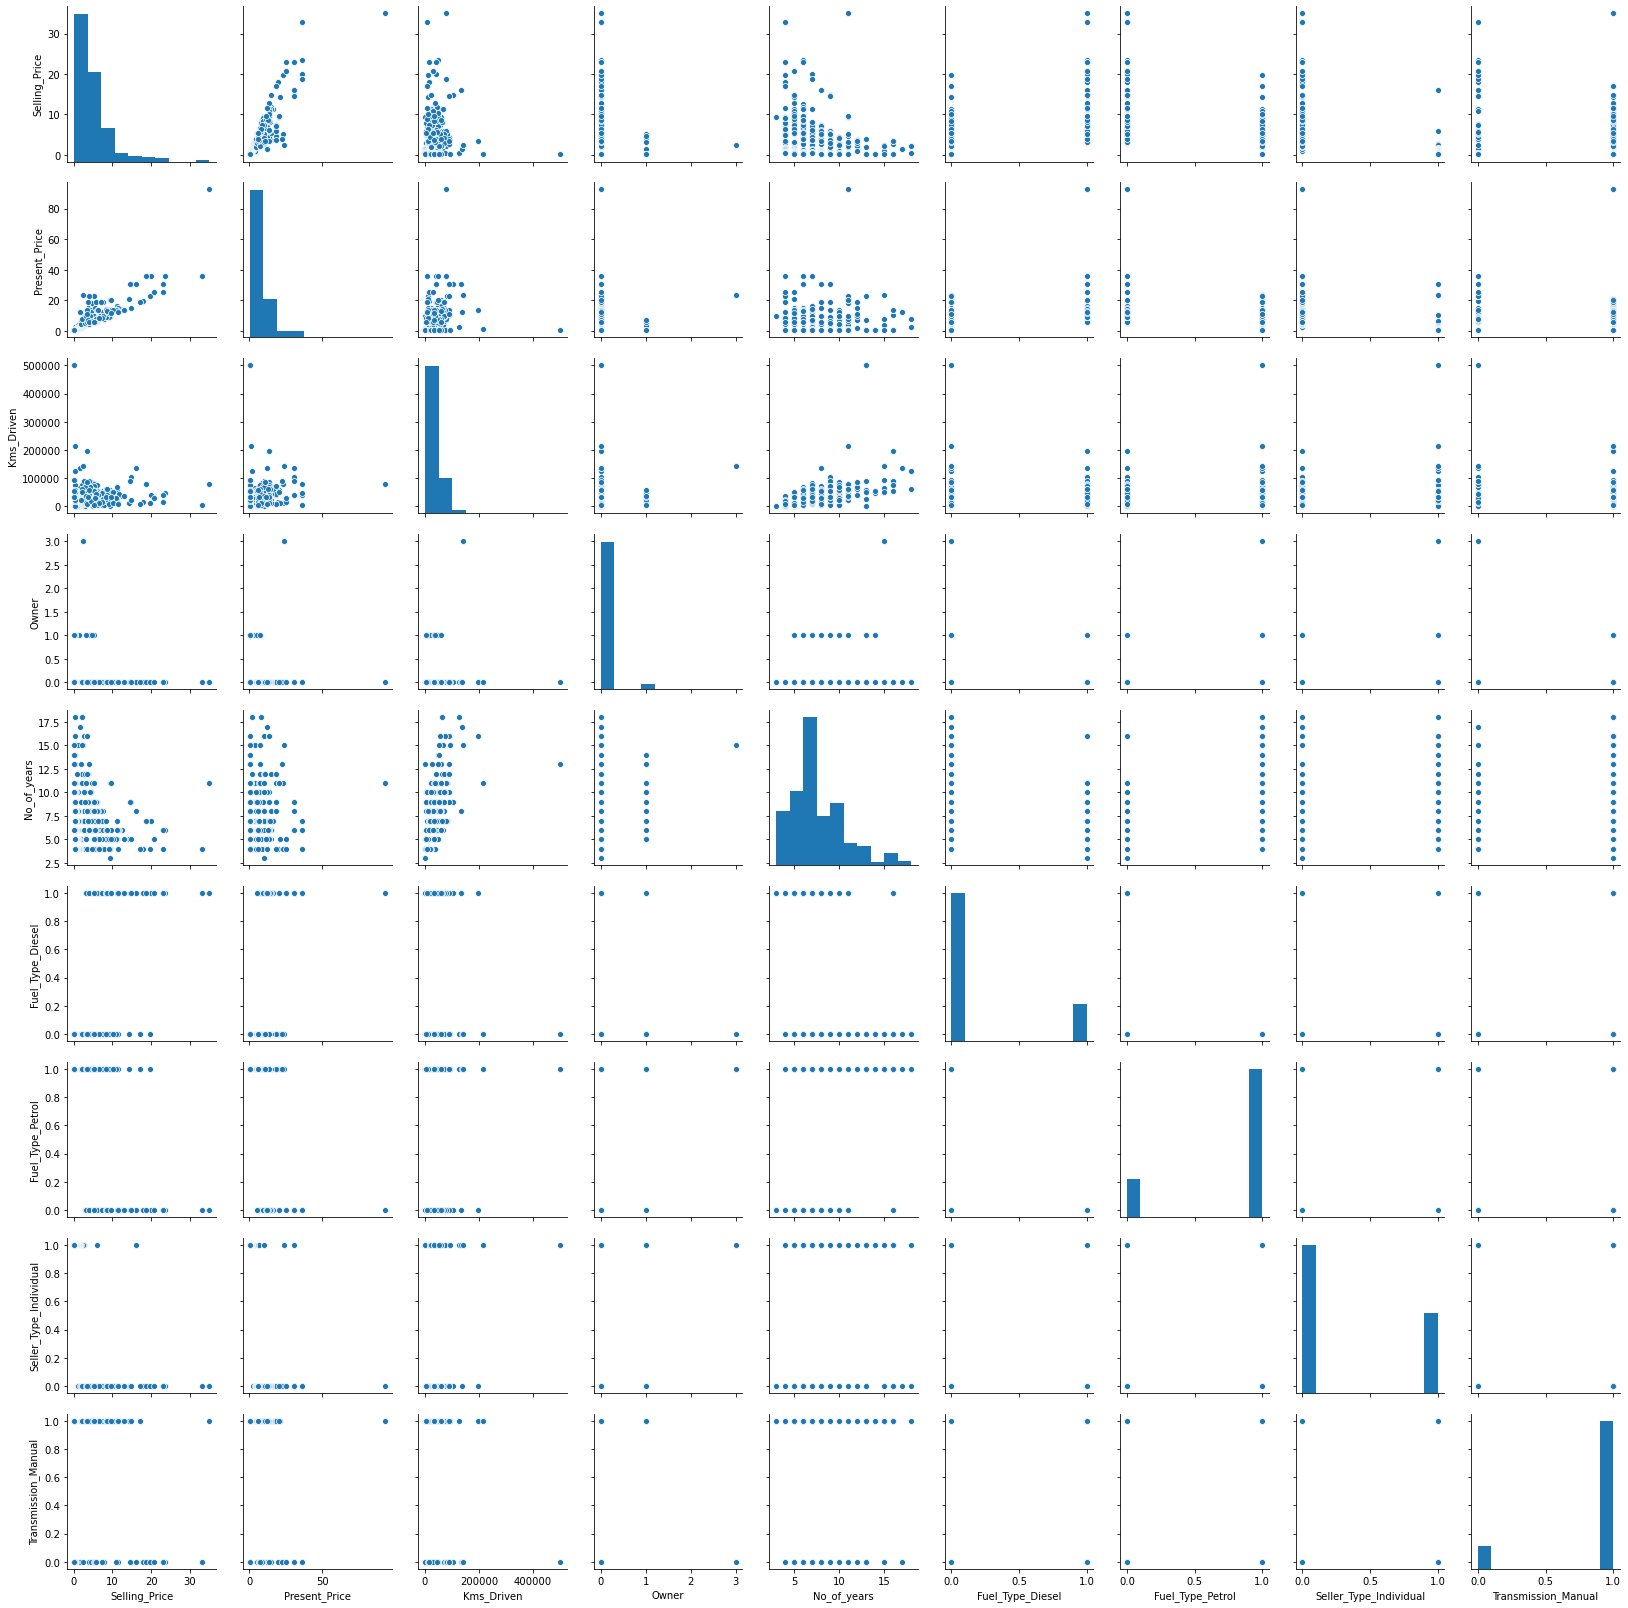

In [74]:
# pair plot for the features
sns.pairplot(df)

<AxesSubplot:>

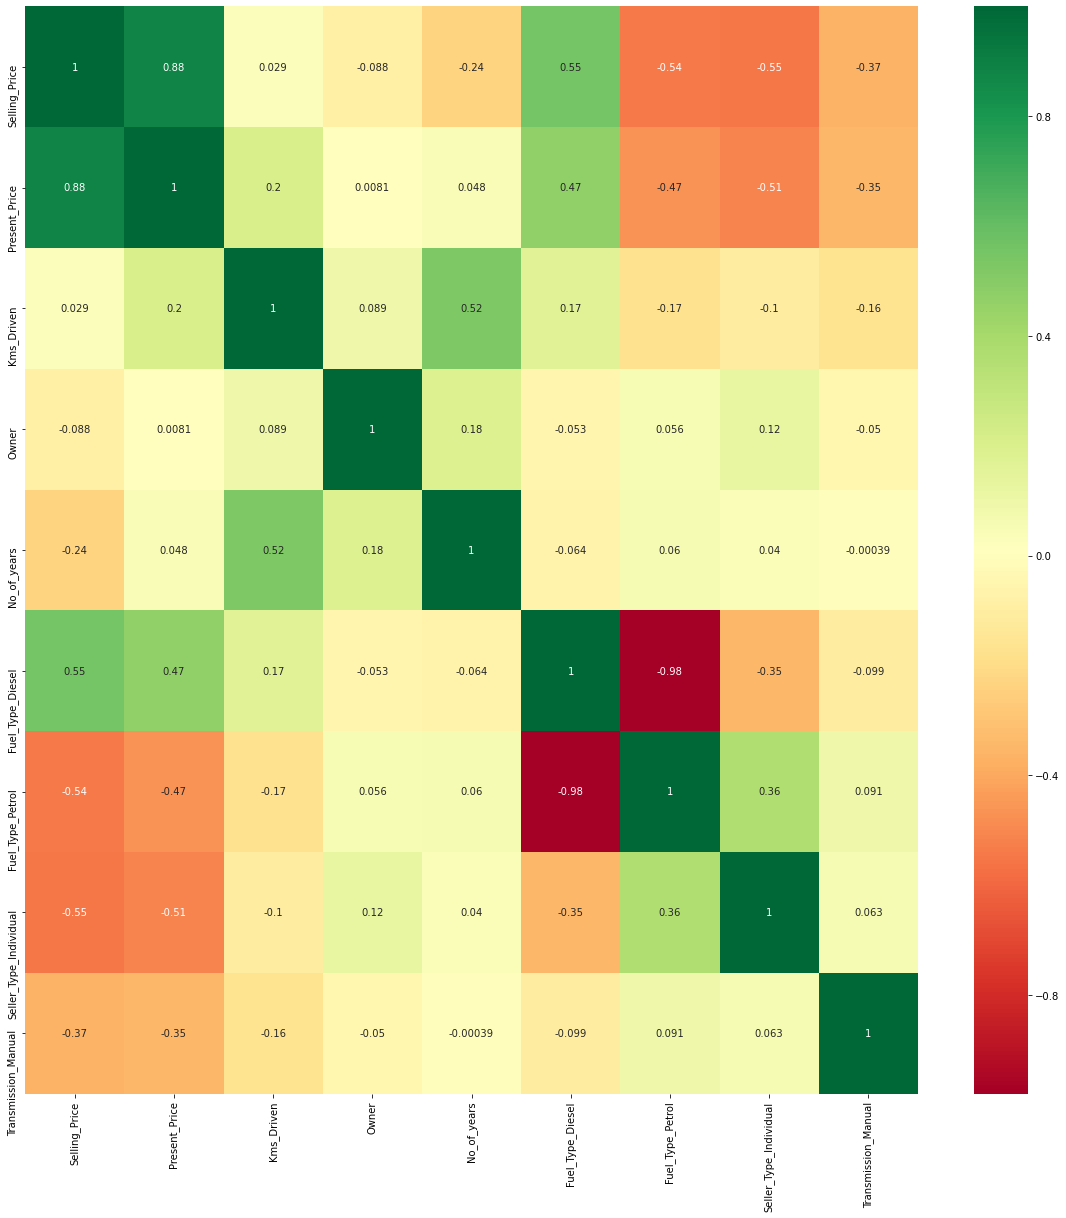

In [75]:
# getting important features
corr_df = df.corr()
top_corr_features = corr_df.index
plt.figure(figsize=(20,20))
# plotting heatmap
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [76]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [77]:
# splitting into dependent and independent features
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [78]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [79]:
# Feature importance
# Extra tree regressor is used to see which features are important for the target variable
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [80]:
# displaying feature importance for the independent feature
print(model.feature_importances_)

[0.38972987 0.04067941 0.00082601 0.07681377 0.22567504 0.01092565
 0.12631953 0.1290307 ]


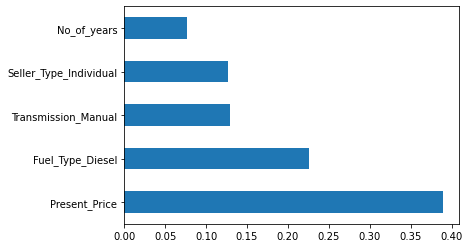

In [81]:
# plot graph of feature importance for better visualization
f_importance = pd.Series(model.feature_importances_, index=X.columns)
# taking top 5 important features and plotting them
f_importance.nlargest(5).plot(kind="barh")
plt.show()

In [82]:
# splitting data into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [83]:
# numbers of rows in train data
X_train.shape

(240, 8)

In [84]:
# using random forest for model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

## Fitting the model with default parameters

In [85]:
# using default hyper-parameters
# fitting the model 
rf.fit(X_train,y_train)

RandomForestRegressor()

In [86]:
# predicting the x test values
pred_default = rf.predict(X_test)

In [87]:
pred_default

array([ 1.049 ,  9.3397, 10.0275,  5.699 ,  2.5955,  2.8645,  3.977 ,
        0.6561,  3.974 ,  5.3105,  2.608 ,  0.3515,  2.872 ,  1.15  ,
        1.426 ,  2.922 ,  3.7675,  1.2195, 21.4863,  6.826 , 10.7477,
        0.4083,  3.8192, 11.5005,  6.435 ,  4.447 ,  0.5794,  4.708 ,
        1.1535,  6.7   ,  7.595 , 16.9805,  6.6725,  3.789 ,  7.164 ,
       20.3046,  4.27  ,  6.3145,  0.7597,  0.5998,  0.4564,  0.5839,
       11.186 ,  0.2374,  9.4177, 16.1048,  2.938 ,  9.4981,  7.8957,
        5.7005,  0.3277,  0.4382, 21.7952,  5.5661,  2.6315,  8.0412,
        8.7579,  0.5663,  0.4381,  5.1315,  2.504 ])

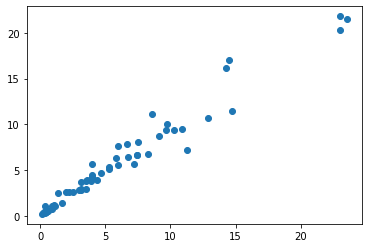

In [88]:
# checking how the prediction value stands against y_test values
# linearity observed means prediction done is pretty good
plt.scatter(y_test, pred_default)

In [89]:
#Calculating the mean absolute error:  
print("The MAE is :" , mean_absolute_error(y_test,pred_default) ) #Mean absolute error 
#Calculating the R_square value:
print("The R-square is :",r2_score(y_test,pred_default))    #R_square value

The MAE is : 0.7354721311475416
The R-square is : 0.9577305219992563


## Hyper - parameter tuning using Randomized search CV

In [90]:
## Hyper-parameters
n_estimators = [int(x) for x in np.linspace(start=100,stop=1000,num=10)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


In [91]:
# Using Randomzied search CV over grid search since it is faster
# No.of trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1000,num=10)]
# No. of featrues to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in the tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
# minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [92]:
# importing random search CV
from sklearn.model_selection import RandomizedSearchCV

In [93]:
# creating the random grid
random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf
              }

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [94]:
# using the random grid to search for the best hyper parameters
# n_iter=10, n_jobs=-1 means all of the laptop cores will be used i.e processoers
# if verbose not given, result wont be displayed in the next step
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=16, n_jobs=-1)

In [95]:
# fitting the random search cv using the above parameters 
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=16, scoring='neg_mean_squared_error',
                   verbose=2)

In [96]:
# checking the best params from the randomized search CV
rf_random_best_params = rf_random.best_params_

In [97]:
# displaying the best params calculated
print("Best params are: ", rf_random_best_params)

Best params are:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10}


In [98]:
# predicting the x test values
pred = rf_random.predict(X_test)

In [99]:
pred

array([ 1.10291376,  8.07989643,  9.89375222,  5.85842284,  2.42946389,
        2.79566488,  3.9918597 ,  0.67973261,  4.1505931 ,  5.23421807,
        2.65492337,  0.32305785,  2.90934008,  1.20021376,  1.42824603,
        2.90091429,  3.80619802,  1.22765033, 22.4888423 ,  6.43314873,
       10.77832153,  0.44407556,  3.63763858, 11.68421606,  6.37277807,
        4.41883459,  0.58520634,  4.61698538,  1.14841224,  6.80421307,
        7.66525313, 17.70989754,  6.60377238,  3.80672422,  6.7163908 ,
       19.81770581,  4.30437894,  6.16378278,  0.76729832,  0.60289868,
        0.44738876,  0.5770436 , 10.93044267,  0.23512461,  9.34834205,
       15.58653929,  2.95822262,  9.29192196,  7.81482348,  6.35920529,
        0.3339266 ,  0.43322026, 20.8767004 ,  5.4593984 ,  2.66562791,
        7.85241142,  8.65177839,  0.56597929,  0.45644218,  5.23261091,
        2.50934405])

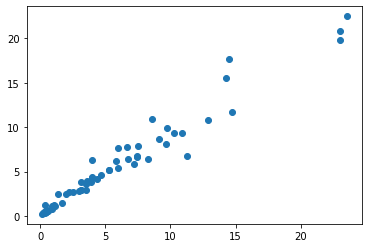

In [100]:
# checking how the prediction value stands against y_test values
# linearity observed means prediction done is pretty good
plt.scatter(y_test, pred)

In [101]:
from sklearn.metrics import r2_score, mean_absolute_error

In [102]:
#Calculating the mean absolute error:  
print("The MAE is :" ,mean_absolute_error(y_test,pred) ) #Mean absolute error 
#Calculating the R_square value:
print("The R-square is :",r2_score(y_test,pred))    #R_square value

The MAE is : 0.7752738336466205
The R-square is : 0.9509927626779525


#### R square value of 92% is a good score for the model 

Scope for the project: Multiple linear regression model could be used to see which model gives better accuracy

## Fitting the model with the best parameters calculated using Randomized search CV

In [103]:
# using best parameters
rf1 = RandomForestRegressor(n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=10)

In [104]:
# fitting the model
rf1.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=300)

In [105]:
# predicting the x test values
pred_best = rf1.predict(X_test)

In [106]:
pred_best

array([ 1.11192864,  8.69229491,  9.87527476,  5.83704951,  2.40261164,
        2.7890877 ,  3.84645143,  0.66447615,  4.13669486,  5.2869649 ,
        2.68977286,  0.31437091,  2.90675747,  1.20569226,  1.43206806,
        2.90572751,  3.84396687,  1.2330621 , 22.67442571,  6.45162143,
       10.81953884,  0.44901443,  3.41442045, 11.76560919,  6.38709915,
        4.4849316 ,  0.58774777,  4.70406883,  1.14910661,  6.79322061,
        7.74961409, 17.6316498 ,  6.56161972,  3.81092771,  6.63491733,
       19.99389001,  4.34336331,  6.16915862,  0.77376499,  0.60530294,
        0.45422107,  0.56972272, 11.06731356,  0.23547901,  9.28978655,
       15.71639893,  2.94746786,  9.176705  ,  7.8336363 ,  6.6013084 ,
        0.33895355,  0.43231234, 21.13291258,  5.49356276,  2.63143783,
        7.9035813 ,  8.73553349,  0.56441195,  0.45352716,  5.18609286,
        2.45784365])

In [107]:
#Calculating the mean absolute error:  
print("The MAE is :" ,mean_absolute_error(y_test,pred_best) ) #Mean absolute error 
#Calculating the R_square value:
print("The R-square is :",r2_score(y_test,pred_best))    #R_square value

The MAE is : 0.7649785514788799
The R-square is : 0.9517278388401771


### Conclusion:- Hyper-parameter tuning can be used to check which parameters should be used to improve the model accuracy further. For this case, there has been an increase of 1 percent in the model performance. i.e  from 91% to 92%